# 泰坦尼克号 - 数据分析

## 目录
<ul>
<li><a href="#intro">项目介绍</a></li>
<li><a href="#question">1. 提出问题(Question)</a></li>
<li><a href="#wrangling">2. 数据清洗(Data Wrangling)</a></li>
<li><a href="#eda">3. 数据探索(Data Exploration)</a></li>
<li><a href="#conclusions">4. 作出结论(Draw Conclusion)</a></li>
</ul>

<a id='intro'></a>
## 项目介绍

泰坦尼克号的沉没是历史上最骇人听闻的沉船事件之一，事件发生在1912年8月15日，最不可思议的是，这次沉船事件就发生在泰坦尼克号的处女航中。在撞了冰山之后，泰坦尼克号就慢慢沉入海中，最终2224的总人数中，有1502人死亡。  

在这次事故当中，救生船数量不足直接导致了更多的死亡人数，在副船长“女士和小孩优先上救生船”的口令下，女性和低龄儿童有着更高的生还率。当然，除此之外，还有很多影响生还率的因素，数据中包含的因素主要如下：

| Variable  |  Definition  |  Key  |
|---:       |    :---:     | :---: |
|Survived   | 生还率        | 	0 = No, 1 = Yes |
|Pclass     | 船票级别      |  1 = 1st, 2 = 2nd, 3 = 3rd |
|Sex        | 性别          |       |
|Age        | 年龄          |       |
|SibSp      | 船上的兄弟姐妹、配偶人数 |       |
|Parch      | 船上的父母、子女人数     |       |
|Ticket     | 票号          |       |
|Fare       | 票价          |       |
|Cabin      | 船舱号        |       |
|Embarked   | 登船港口      | C = Cherbourg, Q = Queenstown, S = Southampton |


在这个项目当中，我将通过数据分析和图形化展示的方式，来分析影响生还率的主要因素有哪些，具体步骤如下：
- 提出问题(Question)
- 数据清洗(Data Wrangling)
- 数据探索(Data Exploration)
- 作出结论(Draw Conclusion)

<a id='question'></a>
## 1. 提出问题

### 哪些因素会提高泰坦尼克号船员或者乘客的生还率？

<a id='wrangling'></a>
## 2. 数据清洗(Data Wrangling)

### 2.1 读取数据

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('titanic-data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 清洗数据  

#### 2.2.1 去除没有用的数据
PassengerId, Name, Ticket, Cabin都是名称信息或者编号，暂时不做数据分析的因素，影响也不大。

In [148]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### 2.2.2 处理缺失的数据

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


通过上述信息概况，可以看出'Age', 'Embarked'这两列的数据并不完整。  
#### 2.2.2.1 首先处理"Age"列的缺失数据：

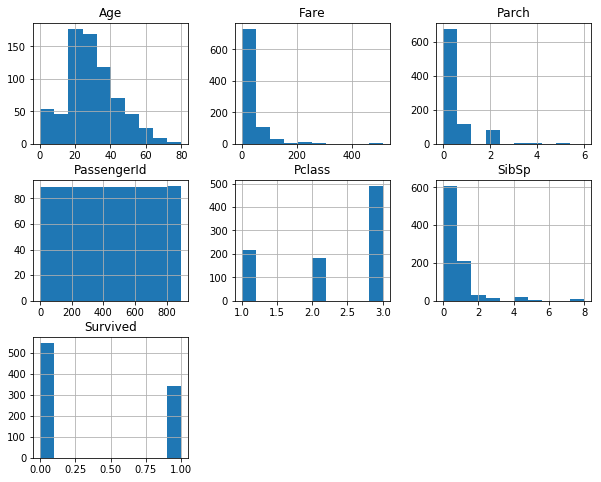

In [150]:
# 通过图表来分析总体的数值分布情况
df.hist(figsize=(10, 8));

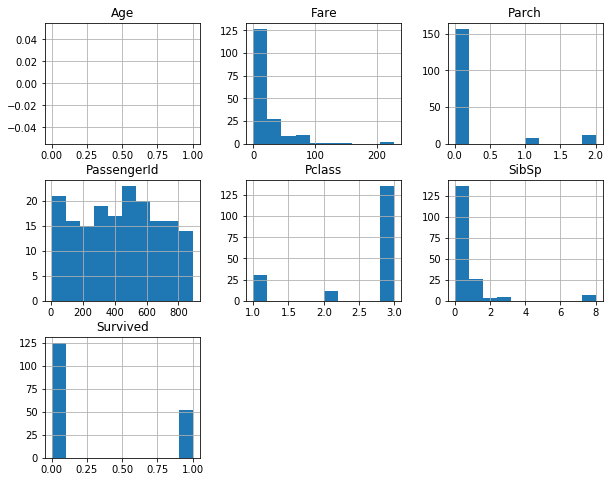

In [151]:
# 通过图表，查看缺失了'Age'字段的乘客数据分布情况
df[df.Age.isnull()].hist(figsize=(10,8));

通过以上两组图表的对比，可以看出缺失了'Age'字段的数据分布情况和总体数据的分布情况很相似, 无论是Fare、Parch、Pclass、SibSp还是Survived，分布都很相似，所以我们可以将缺失了'Age'字段信息的乘客们，都假定拥有平均年龄。

In [152]:
df[df.Age.isnull()].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,male,NaN,0,0,8.4583,Q
17,18,1,2,male,NaN,0,0,13.0000,S
19,20,1,3,female,NaN,0,0,7.2250,C
26,27,0,3,male,NaN,0,0,7.2250,C
28,29,1,3,female,NaN,0,0,7.8792,Q


In [153]:
print df.Age.mean()

29.6991176471


In [154]:
df.fillna(df.mean(), inplace=True)
df[df.Age.notnull()].head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [155]:
# 缺失了'Age' 字段的乘客信息处理好了，可以看到'Age'有891条完整的数据。
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB
None


#### 2.2.2.2 处理缺失了'Embarked'字段的乘客信息

In [156]:
# 查看一下缺失了'Embarked'字段的两名乘客
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [157]:
# 由于只有两名乘客，可以暂时去除这两名乘客的信息。
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


到这里，我们就处理好了所有的数据，准备进入下一个阶段 - 数据探索。

<a id='eda'></a>
## 3. 数据探索 - Data Exploration

In [158]:
print df.shape
df.describe()

(889, 9)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


通过describe()函数，我们可以大概看出数据特征，接下来我们要逐一地分析每一个影响生还率的因素。

### 3.1 探索票价对生还率的影响 -  Analyze the 'Fare' column

In [159]:
survived = df.Survived == True
died = df.Survived == False

fare_survived = df.Fare[survived]
fare_died = df.Fare[died]

print 'Show survived passengers\' fare:'
print fare_survived.head()
print ''
print 'Show died passengers\' fare:'
print fare_died.head()

Show survived passengers' fare:
1    71.2833
2     7.9250
3    53.1000
8    11.1333
9    30.0708
Name: Fare, dtype: float64

Show died passengers' fare:
0     7.2500
4     8.0500
5     8.4583
6    51.8625
7    21.0750
Name: Fare, dtype: float64


In [160]:
print 'Survived passengers\' mean fare: {}'.format(fare_survived.mean())
print "Died passengers\' mean fare: {}".format(fare_died.mean())

Survived passengers' mean fare: 48.2094982353
Died passengers' mean fare: 22.1178868852


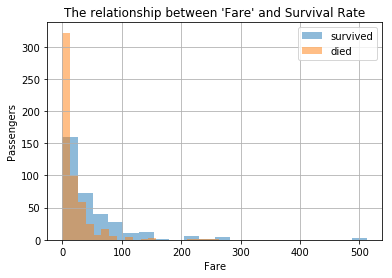

In [161]:
# fare_survived.hist().set_xlabel("Fare");
# fare_survived.hist().set_ylabel("Passengers");

survived_histogram = fare_survived.hist(alpha=0.5, bins=20, label='survived')
died_histogram = fare_died.hist(alpha=0.5, bins=20, label='died')

plt.legend();
survived_histogram.set_xlabel('Fare');
survived_histogram.set_ylabel('Passengers');
survived_histogram.set_title('The relationship between \'Fare\' and Survival Rate');

#### 结论： 可以分析出票价越高的乘客，生还率相对高一些。

### 3.2 探索船票级别对生还率的影响 - Analyze the 'Pclass' column

### Code Review: 
'''
对于pclass变量只进行了存活率计算，而没有计算各个群体的人口数目，这样是有误的。
因为采用存活率=该群体存活人口数／该群体数量，单单这个除法的计算而没有观察分母
的大小(样本数量)的话这个计算并没有意义。
比如说如果高等级人群存活率计算得出100%，但是如果这个群体总共只有1个人的话，
这个所计算出来的存活率100%可信吗？显然不可以的，因为样本数量太少。
所以我们需要对每个分析的变量计算人口数量分布并且用图形来可视化。
'''

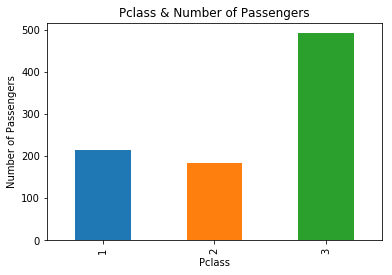

In [184]:
df.groupby('Pclass')['PassengerId'].count().plot(kind='bar')
plt.title('Pclass & Number of Passengers')
plt.ylabel('Number of Passengers');

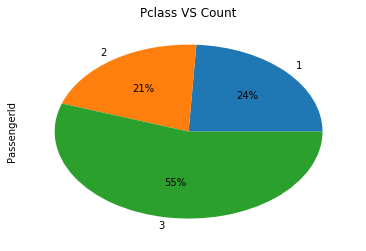

In [185]:
df.groupby('Pclass')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Pclass VS Count')
plt.show()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


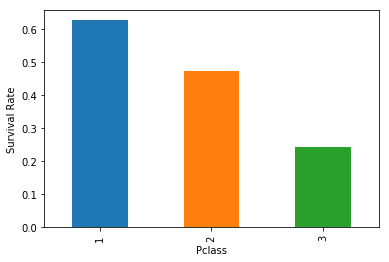

In [186]:
pclass_survived_rate = df.groupby('Pclass').Survived.mean()
print pclass_survived_rate
pclass_plot = pclass_survived_rate.plot(kind='bar');
pclass_plot.set_ylabel('Survival Rate');


#### 结论：三等船票的人数最多；船票级别越高，生还率相对越高。

### 3.3 探索年龄对生还率的影响 - Analyze the 'Age' column

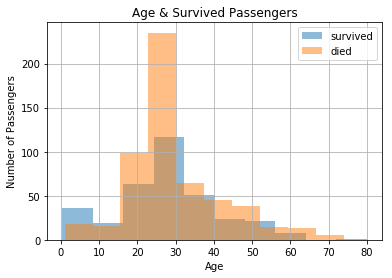

In [176]:
df.Age[survived].hist(alpha=0.5, label='survived')
df.Age[died].hist(alpha=0.5, label='died')
plt.legend();
plt.title('Age & Survived Passengers');
plt.xlabel('Age');
plt.ylabel('Number of Passengers');

#### 结论：小于18岁左右的未成年儿童的生还率最高；20-30岁的青年生还率最低。

### 3.4 探索年龄对生还率的影响 - Analyze the 'Sex' column

#### 3.4.1 男性、女性的生还率

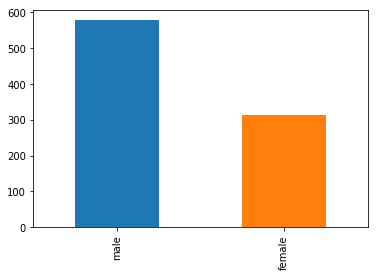

In [165]:
# 男性、女性人数分布情况
df.Sex.value_counts().plot(kind='bar');

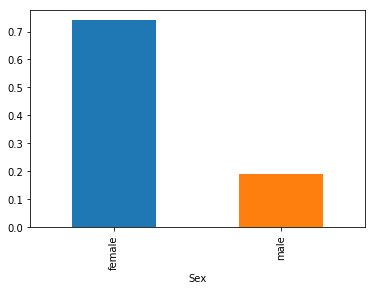

In [166]:
# 男性、女性生还率计算
df.groupby('Sex').Survived.mean().plot(kind='bar');

#### 结论：女性的生还率要远远大于男性的生还率。

#### 3.4.2 船票等级'Pclass'对不同性别的乘客生还率的影响 - Analyze the 'Pclass' column

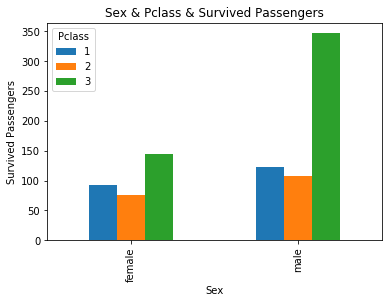

In [167]:
df.groupby('Sex')['Pclass'].value_counts().unstack().plot(kind='bar');
plt.title('Sex & Pclass & Survived Passengers');
plt.ylabel('Survived Passengers');

In [168]:
df.query('Sex == "female"')['Fare'].median(), df.query('Sex == "male"')['Fare'].median()

(23.0, 10.5)

Sex       female      male
Pclass                    
1       0.967391  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


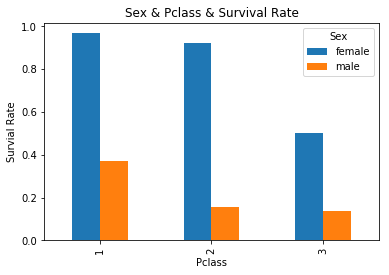

In [169]:
# Code Review 1: 避免使用一个轴度去代表多个变量。这个图形中还有颜色变量没有利用上，我们可以使用x轴和y轴各代表一个变量，而颜色元素代表另一个变量.
# Original Code: 
# print df.groupby(['Pclass', 'Sex'])['Survived'].mean()
# df.groupby(['Pclass', 'Sex'])['Survived'].mean().plot(kind='bar');

# After Revision:
print df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar');
plt.title('Sex & Pclass & Survival Rate')
plt.ylabel('Survial Rate');
plt.show;


#### 结论：通过图表，可以清晰的看出总体的分布情况，船票等级越高，生还率越高；而且女性的总体生还率都大大高于男性总体生还率。

### 3.5 探索兄弟姐妹和配偶人数对生还率的影响 - Analyze the 'SibSp' column

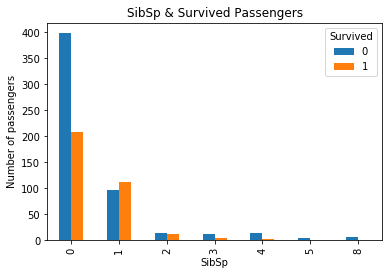

In [170]:
# Code Review 2: 建议可以将其改为堆叠柱状图
# df.SibSp[survived].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='survived', stacked='True')
# df.SibSp[died].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='died', stacked='True')
# plt.legend();

# After revised:
df.groupby(['SibSp', 'Survived'])['Survived'].count().unstack().plot(kind='bar');
plt.ylabel('Number of passengers');
plt.title('SibSp & Survived Passengers');

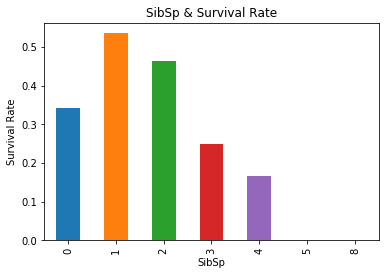

In [171]:
df.groupby('SibSp')['Survived'].mean().plot(kind='bar');
plt.ylabel('Survival Rate');
plt.title('SibSp & Survival Rate');

#### 结论：船上大部分乘客，都没有兄弟姐妹或者配偶同行，而且这部分乘客有着大约35%的生还率，比较低；有1位配偶或者兄弟姐妹同行的乘客，生还率最高，稍高于50%；多于1位配偶或兄弟姐妹的乘客人数较少，数据不具有代表性。

### 3.6 探索父母和子女人数对生还率的影响 - Analyze the 'Parch' column

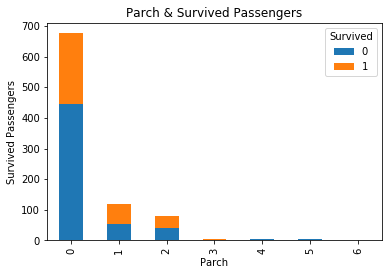

In [172]:
# df.Parch[survived].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='survived')
# df.Parch[died].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='died')
# plt.legend();

# After revised:
df.groupby(['Parch', 'Survived'])['Survived'].count().unstack().plot(kind='bar', stacked='True');
plt.title('Parch & Survived Passengers');
plt.ylabel('Survived Passengers');

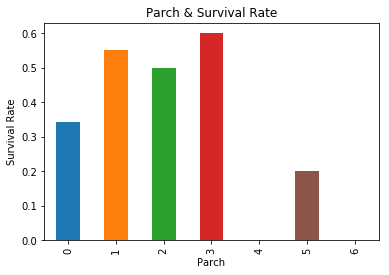

In [173]:
df.groupby('Parch')['Survived'].mean().plot(kind='bar');
plt.ylabel('Survival Rate');
plt.title('Parch & Survival Rate');

#### 结论：船上大部分乘客，都没有父母或者子女同行，而且这部分乘客有着大约35%的生还率，比较低；有1-2位父母或者子女同行的乘客，生还率最高，50%左右；多于2位父母或子女的乘客人数较少，数据不具有代表性。

### 3.7 探索出发港口对生还率的影响 - Analyze the 'Embarked' column

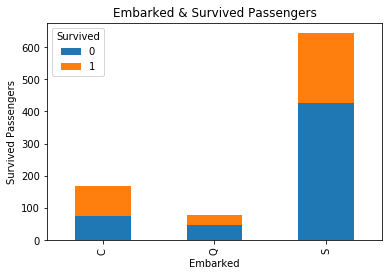

In [174]:
# df.Embarked[survived].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='survived')
# df.Embarked[died].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='died')
# plt.legend();

# After improvement:
df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack().plot(kind='bar', stacked='True');
plt.title('Embarked & Survived Passengers');
plt.ylabel('Survived Passengers');

#### 结论：可以看出Cherbourg港口出发的乘客生还率最高, Queenstown其次, Southampton港口出发的乘客生还率最低。  
进一步假设：不同港口出发的乘客，船票等级不同; Cherbourg港口出发的1等船票乘客比例应该最大；Southampton港口出发的3等船票乘客比例应该最大。

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


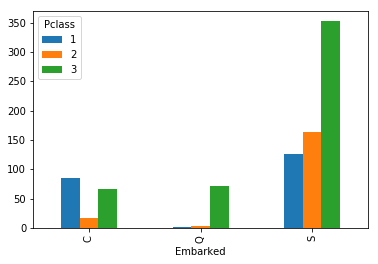

In [175]:
# df[survived].groupby('Embarked')['Pclass'].value_counts().plot(kind='bar', alpha=1, color='green', label='survived');
# # df[died].groupby('Embarked')['Pclass'].value_counts().plot(kind='bar', alpha=0.5, color='red', label='died');

# df.groupby('Embarked')['Pclass'].value_counts().plot(kind='bar', alpha=0.5, color='yellow', label='all');
# plt.legend();

df.groupby(['Embarked', 'Pclass'])['Survived'].count().unstack().plot(kind='bar');
print df.groupby(['Pclass', 'Embarked'])['Survived'].count().unstack()


#### 结论：  
1. 通过图表分析看出，假设是成立的，即：不同港口出发的乘客，船票等级不同; Cherbourg港口出发的1等船票乘客比例最大；Southampton港口出发的3等船票乘客比例最大。   
2. 通过这张图也能看出，不管是哪个港口出发，确实船票等级越高，生还率越高。

<a id='conclusions'></a>
## 4. 作出结论(Draw Conclusion)

### 通过对第三步探索数据的归纳总结，可以罗列出以下结论：  

* 4.1 'Fare': 票价越高的乘客，生还率相对高一些。  
* 4.2 'Pclass': 船票级别越高，生还率相对越高。  
* 4.3 'Age': 小于18岁左右的未成年儿童的生还率最高；20-30岁的青年生还率最低。   
* 4.4 'Sex': 女性的生还率要远远大于男性的生还率。   
* 4.5 'SibSp': 船上大部分乘客，都没有兄弟姐妹或者配偶同行，而且这部分乘客有着大约30%的生还率，比较低；有1位配偶或者兄弟姐妹同行的乘客，生还率最高，稍高于50%；多于1位配偶或兄弟姐妹的乘客人数较少，数据不具有代表性。   
* 4.6 'Parch': 船上大部分乘客，都没有父母或者子女同行，而且这部分乘客有着大约30%的生还率，比较低；有1-2位父母或者子女同行的乘客，生还率最高，50%左右；多于2位父母或子女的乘客人数较少，数据不具有代表性。  
* 4.7 'Embarked':    
        - Cherbourg港口出发的乘客生还率最高, Queenstown其次, Southampton港口出发的乘客生还率最低。  
        - 不同港口出发的乘客，船票等级不同; Cherbourg港口出发的1等船票乘客比例应该最大；Southampton港口出发的3等船票乘客比例应该最大。
        - 不管是哪个港口出发，确实船票等级越高，生还率越高。

### 报告分析的限制性：

- 1. 报告的数据并不完整，只抽取了900左右的乘客人员的数据，而总的数据应该是2224名乘员（包括乘客和工作人员），所以数据样本是不够大的，分析报告会存在一定的偏差。
- 2. 还有很多影响生还率的因素，例如救生圈数量、职业、是乘客还是工作人员等等因素，考虑的因素越多，其实相对而言预测更加准确。
- 3. 对数据的处理方式也会存在偏差，这篇报告只是通过展示图表的形式直观的分析，如果能用一些高效准确的数学算法模型来分析，或许会更加准确。